# Online Education: Trial Class Conversion

An online edtech company offers English classes for kids. It has free trial classes for potential students. Some of them later purchase a full course.

**Question**  
Which factors determine conversion from a trial class into a purchase?  

**Data**  
50k raw observations with 20 features for April-May 2019.

# First look

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data

,class_id,parent_id,student_id,teacher_id,teacher_is_native_english_speaker,class_booking_time,class_start_time,class_status,source_of_fail,reason_of_fail,tech_problem_type,class_topic_id,student_needs_level_correction,student_needs_class_redone,student_first_connected,teacher_first_connected,student_device_os_name,student_device_type,student_age,first_payment_time
0,319852918,2185298,1377988,1939364,False,2019-04-09T16:08:07.968Z,2019-04-17T00:00:00Z,cancelled,student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,tablet,3.0,2019-04-26T20:12:41.036Z
1,319854218,2185298,1377988,1939364,False,2019-04-14T12:29:14.978Z,2019-04-17T00:30:00Z,failed,student,absent,NaN,889.0,NaN,NaN,NaN,2019-04-17T00:26:56.177Z,NaN,NaN,3.0,2019-04-26T20:12:41.036Z
2,319854219,2185298,1378008,1939364,False,2019-04-09T16:08:14.565Z,2019-04-17T00:30:00Z,cancelled,student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2019-04-26T20:12:41.036Z
3,319855519,2185298,1378008,1939364,False,2019-04-14T12:29:21.98Z,2019-04-17T01:00:00Z,failed,student,absent,NaN,905.0,NaN,NaN,NaN,2019-04-17T00:55:10Z,NaN,NaN,4.0,2019-04-26T20:12:41.036Z
4,658867141,2251219,1430269,4144556,True,2019-04-13T00:31:46.396Z,2019-04-17T01:00:00Z,failed,student,absent,NaN,1310.0,NaN,NaN,NaN,2019-04-17T00:56:38.652Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,846843462,2831385,1912304,2723899,False,2019-05-28T18:32:10.983Z,2019-05-28T20:00:00Z,failed,student,absent,NaN,1310.0,NaN,NaN,NaN,2019-05-28T19:59:14.004Z,Windows,desktop,NaN,NaN
49994,761681545,2793944,1880673,3713213,False,2019-05-27T19:23:04.208Z,2019-05-28T20:00:00Z,failed,student,absent,NaN,1644.0,NaN,NaN,NaN,2019-05-28T19:55:43.303Z,NaN,NaN,4.0,NaN
49995,754712303,2824585,1906424,3281970,False,2019-05-28T12:57:00.119Z,2019-05-28T21:00:00Z,failed,student,absent,NaN,1644.0,NaN,NaN,NaN,2019-05-28T20:55:00Z,Windows,desktop,5.0,NaN
49996,843049601,2824375,1906224,4155091,True,2019-05-28T12:48:06.587Z,2019-05-28T21:00:00Z,failed,student,absent,NaN,1644.0,NaN,NaN,NaN,2019-05-28T20:57:43.781Z,Windows,desktop,5.0,NaN


In [3]:
data.shape

(49998, 20)

In [4]:
data['student_id'].nunique()

39404

Almost 50k observations with 20 features.  
Of them almost 40k unique students.

In [5]:
variable = 'class_status'
print('NaN:', data[variable].isna().sum())
data[variable].value_counts()

NaN: 0


failed       21818
cancelled    13466
completed    13315
deleted       1399
Name: class_status, dtype: int64

In [6]:
data[data['class_status'] == 'completed']

,class_id,parent_id,student_id,teacher_id,teacher_is_native_english_speaker,class_booking_time,class_start_time,class_status,source_of_fail,reason_of_fail,tech_problem_type,class_topic_id,student_needs_level_correction,student_needs_class_redone,student_first_connected,teacher_first_connected,student_device_os_name,student_device_type,student_age,first_payment_time
8,684691574,2280089,1453559,38485,True,2019-04-15T09:55:32.688Z,2019-04-17T04:00:00Z,completed,NaN,NaN,NaN,905.0,False,False,2019-04-17T03:55:10Z,2019-04-17T03:59:25.699Z,Windows,desktop,3.0,NaN
9,311249625,2223379,1408689,1264283,False,2019-04-13T02:16:20.382Z,2019-04-17T04:00:00Z,completed,NaN,NaN,NaN,1310.0,True,False,2019-04-17T04:03:44.68Z,2019-04-17T03:59:43.256Z,Windows,desktop,NaN,2019-04-17T10:17:16.106Z
10,525909471,2263259,1443279,3096738,False,2019-04-14T12:40:04.147Z,2019-04-17T04:00:00Z,completed,NaN,NaN,NaN,1644.0,True,False,2019-04-17T03:55:47.158Z,2019-04-17T03:55:10Z,Windows,desktop,3.0,NaN
13,631588161,2144678,1342238,244051,False,2019-04-10T23:29:54.479Z,2019-04-17T05:00:00Z,completed,NaN,NaN,NaN,1513.0,False,False,2019-04-17T04:55:41.34Z,2019-04-17T04:59:22.24Z,Android,tablet,NaN,NaN
20,355699840,2275929,1450159,3175031,False,2019-04-15T01:52:40.977Z,2019-04-17T06:00:00Z,completed,NaN,NaN,NaN,905.0,False,True,2019-04-17T06:00:31.238Z,2019-04-17T05:59:07.249Z,macOS,desktop,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,809174737,2828565,1909874,342718,False,2019-05-28T16:16:55.42Z,2019-05-28T19:00:00Z,completed,NaN,NaN,NaN,1643.0,True,False,2019-05-28T18:58:39.423Z,2019-05-28T18:58:18.919Z,iOS,mobile,3.0,2019-06-07T14:29:57.632Z
49981,842726598,2813105,1895963,342718,False,2019-05-27T20:37:49.529Z,2019-05-28T19:30:00Z,completed,NaN,NaN,NaN,905.0,False,False,2019-05-28T19:33:58.067Z,2019-05-28T19:27:16.04Z,Windows,desktop,5.0,NaN
49983,756085184,2747154,1874503,1874304,True,2019-05-28T17:37:53.209Z,2019-05-28T19:30:00Z,completed,NaN,NaN,NaN,1310.0,False,False,2019-05-28T19:29:22.315Z,2019-05-28T19:27:28.424Z,Windows,desktop,NaN,NaN
49986,845590360,2627663,1772102,2266394,False,2019-05-28T14:27:17.226Z,2019-05-28T19:30:00Z,completed,NaN,NaN,NaN,1418.0,False,False,2019-05-28T19:30:52.594Z,2019-05-28T19:25:00Z,Windows,desktop,3.0,NaN


# Features

Technical features:  

* class_id
* parent_id
* student_id
* teacher_id

Time related features:

* class_booking_time
* class_start_time
* student_first_connected
* teacher_first_connected

Potentially important features: 

* teacher_is_native_english_speaker: True/False variable
* class_status: failed/cancelled/completed/deleted
* source_of_fail: student/teacher/service/NaN
* reason_of_fail: absent/technical_problems/other/emergency/illness/technical_issues/short_time_leave/permanent_leave/NaN
* tech_problem_type: connection/video/audio/NaN
* class_topic_id: several topics with above 1000 counts and several with less
* student_needs_level_correction: True/False/NaN
* student_needs_class_redone: True/False/NaN
* student_device_os_name: Windows/Android/MacOS/iOS/Chrome OS/Linux/NaN
* student_device_type: desktop/mobile/tablet/NaN
* student_age: contains NaNs

Target variable:

* first_payment_time - either date or NaN

# Analysis

## Prepare data

Let's prepare our dataset for analysis

First of all, since we need to find factors that cause conversion from trial classes into purchase we will be considering only **completed** classes.  

*Note: there are cases when parents purchased a paid class without completing a trial but these fall under different conversion stage specification and therefore should be analyzed separately.*

In [7]:
df = data[data['class_status'] == 'completed'].copy()

For tech_problem_type we instead will use 0 when it's NaN (we don't have a technical problem) or 1 otherwise (we did have technical issues)

In [8]:
df['tech_problem_type'] = df['tech_problem_type'].apply(lambda x: 0 if x != x else 1)

Our target variable is first_payment_time. We will use 0 if it is NaN and 1 otherwise.

In [9]:
df['first_payment_time'] = df['first_payment_time'].apply(lambda x: 0 if x != x else 1)

## Group data

Number of unique students

In [10]:
df['student_id'].nunique()

13233

Number of unique parents

In [11]:
df['parent_id'].nunique()

12750

We will group the data by parents to guarantee independence of observations. If we grouped our data by students instead, for example, we could get a case where one parent buys classes for two kids and so these two students are not independent. This will be important for validity of A/B tests later.

In [12]:
parents1 = df.groupby('parent_id')[['teacher_is_native_english_speaker',  'class_topic_id', 
                                   'student_needs_level_correction', 
                                   'student_needs_class_redone', 
                                   'student_device_type']].agg(lambda x: x.mode(dropna=False)[0])
parents1

,teacher_is_native_english_speaker,class_topic_id,student_needs_level_correction,student_needs_class_redone,student_device_type
parent_id,,,,,
1804195,False,1513.0,False,False,desktop
1810505,False,1418.0,True,False,desktop
1812805,False,889.0,False,True,desktop
1812915,False,1310.0,False,True,desktop
1813695,False,1418.0,False,False,desktop
...,...,...,...,...,...
2828855,True,1644.0,True,False,NaN
2842535,False,1644.0,False,False,NaN
2842785,False,1644.0,True,False,NaN


In [13]:
parents2 = df.groupby('parent_id')[['first_payment_time']].max()
parents2

,first_payment_time
parent_id,
1804195,1
1810505,0
1812805,1
1812915,1
1813695,1
...,...
2828855,1
2842535,1
2842785,1


In [14]:
parents3 = df.groupby('parent_id')[['student_age']].mean()
parents3

,student_age
parent_id,
1804195,NaN
1810505,NaN
1812805,3.0
1812915,NaN
1813695,NaN
...,...
2828855,5.0
2842535,5.0
2842785,5.0


In [15]:
df['class_booking_time'] = pd.to_datetime(df['class_booking_time'])

In [16]:
parents4 = df.groupby('parent_id')[['class_booking_time']].min()
parents4

,class_booking_time
parent_id,
1804195,2019-05-04 15:36:12.957000+00:00
1810505,2019-05-11 13:06:46.835000+00:00
1812805,2019-05-16 15:54:42.209000+00:00
1812915,2019-05-13 18:41:36.770000+00:00
1813695,2019-04-16 15:41:10.961000+00:00
...,...
2828855,NaT
2842535,NaT
2842785,NaT


In [17]:
parents = pd.concat((parents1, parents3, parents4, parents2), axis=1)
parents.rename(columns={'first_payment_time' : 'purchase'}, inplace=True)

# Before we proceed let's also decompose first class booking time 
# into year, month, day of the week, and hour

parents['year'] = parents['class_booking_time'].dt.year
parents['month'] = parents['class_booking_time'].dt.month
parents['day_of_week'] = parents['class_booking_time'].dt.dayofweek
parents['hour'] = parents['class_booking_time'].dt.hour
parents.drop(columns=['class_booking_time'], inplace=True)

parents

,teacher_is_native_english_speaker,class_topic_id,student_needs_level_correction,student_needs_class_redone,student_device_type,student_age,purchase,year,month,day_of_week,hour
parent_id,,,,,,,,,,,
1804195,False,1513.0,False,False,desktop,NaN,1,2019.0,5.0,5.0,15.0
1810505,False,1418.0,True,False,desktop,NaN,0,2019.0,5.0,5.0,13.0
1812805,False,889.0,False,True,desktop,3.0,1,2019.0,5.0,3.0,15.0
1812915,False,1310.0,False,True,desktop,NaN,1,2019.0,5.0,0.0,18.0
1813695,False,1418.0,False,False,desktop,NaN,1,2019.0,4.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
2828855,True,1644.0,True,False,NaN,5.0,1,NaN,NaN,NaN,NaN
2842535,False,1644.0,False,False,NaN,5.0,1,NaN,NaN,NaN,NaN
2842785,False,1644.0,True,False,NaN,5.0,1,NaN,NaN,NaN,NaN


In [18]:
parents['year'].value_counts()

2019.0    12745
Name: year, dtype: int64

All the observations are for year 2019, so we can drop this column

In [19]:
parents.drop(columns=['year'], inplace=True)

## Group differences analysis 

Check the balance of classes

In [20]:
parents['purchase'].value_counts()

0    6714
1    6036
Name: purchase, dtype: int64

The classes are almost perfectly even, which is excellent

### Teacher is a native speaker

Let's compare the proportions between groups 0 and 1 and make an A/B test to check if the difference in teacher_is_native_english_speaker proportions is statistically significant.  

We will assume that our population is approximately normally distributed.  
Alpha is 0.05.

In [21]:
from statsmodels.stats.proportion import proportions_ztest

In [22]:
def proportions(parents, variable):
    
    a = parents.groupby('purchase')[[variable]].sum()
    n0 = parents['purchase'].value_counts()[0]
    n1 = parents['purchase'].value_counts()[1]
    p0 = a.iloc[0, 0] / n0
    p1 = a.iloc[1, 0] / n1
    print(f"{variable} proportion in group 0: ", p0)
    print(f"{variable} proportion in group 1: ", p1)

    stat, pval = proportions_ztest(count=[a.iloc[0, 0], 
                                          a.iloc[1, 0]], nobs=[n0, n1])
    print()
    print("statistic:", stat)
    print("p-value: ", pval)
    
proportions(parents[['teacher_is_native_english_speaker', 'purchase']].dropna(), 
            'teacher_is_native_english_speaker')

teacher_is_native_english_speaker proportion in group 0:  0.2193923145665773
teacher_is_native_english_speaker proportion in group 1:  0.20510271703114646

statistic: 1.9689305048741887
p-value:  0.04896107199771548


The test shows that the difference is statistically significant.

Proportion of observations where the teacher was a native speaker is 1% higher in group 0 (no purchase) than in group 1 (purchase): 21% vs 20%.  

Although the test shows significance, I doubt that this indicates that native speakers are less efficient in conversion. I am more inclined to think that there is no significant difference between native and non-native speakers in terms of trial class conversion into purchase.  

This is still important because I expected to see the opposite - that native speakers make conversion more probable, which now seems to be wrong.

### Class topic

In [23]:
d = parents.copy()

d['class_topic_id'] = d['class_topic_id'].astype(int).astype(str)

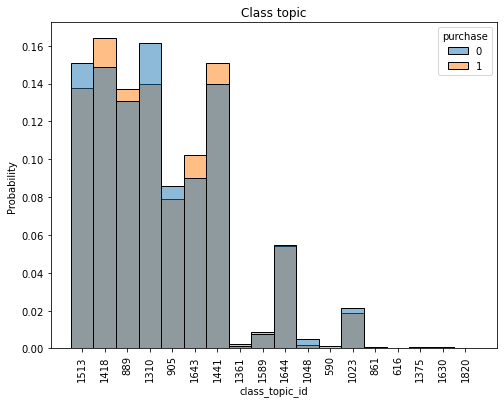

In [24]:
def my_hist(df, var, binwidth='auto', title='', rotate=90):
    f = plt.figure()
    f.set_size_inches(8,6)
    sns.histplot(data=df, x=var, stat='probability', hue='purchase', 
                 binwidth=binwidth, common_norm=False)
    plt.xticks(rotation=rotate)
    plt.title(title)
    plt.show()
    
my_hist(d[['purchase', 'class_topic_id']].dropna(), 'class_topic_id', title='Class topic')

Topics 1513, 1310 and 905 seem to be more prominent among group 0.  

Topics 1418, 889, 1643 and 1441 are more prominent among group 1.

Let's check the difference for these topics for significance.

In [25]:
def group_diff(d, var, val):
    print('Variable: ', var)
    print('Value: ', val)
    c0 = d[(d['purchase'] == 0) & (d[var] == val)][var].count()
    c1 = d[(d['purchase'] == 1) & (d[var] == val)][var].count()
    n0 = len(d[d['purchase'] == 0][var].dropna())
    n1 = len(d[d['purchase'] == 1][var].dropna())
    print(c0, c1)

    stat, pval = proportions_ztest(count=[c0, c1], nobs=[n0, n1])
    print("statistic:", stat)
    print("p-value: ", pval)
    print()

In [26]:
topics = ['1513', '1310', '905', '1418', '889', '1643', '1441']
for t in topics:
    group_diff(d, 'class_topic_id', t)

Variable:  class_topic_id
Value:  1513
1014 830
statistic: 2.1670314843871754
p-value:  0.03023245351382934

Variable:  class_topic_id
Value:  1310
1084 844
statistic: 3.4032108880205993
p-value:  0.0006659885459340265

Variable:  class_topic_id
Value:  905
575 476
statistic: 1.3902333388550747
p-value:  0.1644580327952242

Variable:  class_topic_id
Value:  1418
998 991
statistic: -2.414029371449623
p-value:  0.015777190478169438

Variable:  class_topic_id
Value:  889
879 826
statistic: -0.9814611004169163
p-value:  0.3263654081208388

Variable:  class_topic_id
Value:  1643
604 616
statistic: -2.3177266734605984
p-value:  0.020464180428133676

Variable:  class_topic_id
Value:  1441
938 912
statistic: -1.822503140636285
p-value:  0.06837867763353778



Difference for topics 1513, 1310, 1418 and 1643 is significant.  
Difference for topic 905, 889 and 1441 is not significant.

Topics 1513 and 1310 are more common among group 0 (no purchase) while 1418 and 1643 are among group 1 (purchase).  

This might be due to the nature of the topics, i.e. 1513 and 1310 are more "popular"/introductory while 1418 and 1643 could be more specialized/advanced so that people who go after it have more determination to pursue it further.   

Or it could be training for exams that people are more willing to purchase a complete course of.

Or a specific subject that is popular/unpopular for some reason (i.e. studying numbers is usually difficult while talking about travel is usually more fun)

This could also be a result of teacher self-selection if these topics are common among particular groups of teachers. For example, if for some reason certain topics are more common among male teachers and others among female, it could also affect students preferences and produce this difference. 

### Student needs level correction

In [27]:
proportions(d[['student_needs_level_correction', 'purchase']].dropna(), 'student_needs_level_correction')

student_needs_level_correction proportion in group 0:  0.14462317545427464
student_needs_level_correction proportion in group 1:  0.1386679920477137

statistic: 0.9624273350913415
p-value:  0.33583498811711077


The test shows no significant difference between the two groups in terms of proportion of students who need level correction.

### Student needs class redone

In [28]:
proportions(d[['student_needs_class_redone', 'purchase']].dropna(), 'student_needs_class_redone')

student_needs_class_redone proportion in group 0:  0.12392016681560918
student_needs_class_redone proportion in group 1:  0.1288933068257124

statistic: -0.8441031659518797
p-value:  0.3986117587322986


Again we see no statistically significant difference between the two groups.

### Device type

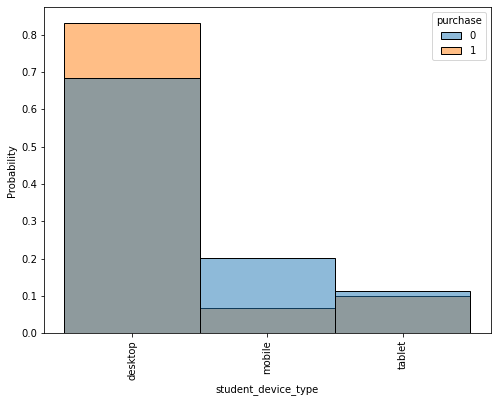

In [29]:
my_hist(d[['purchase', 'student_device_type']].dropna(), 'student_device_type')

In [30]:
desktop0 = len(
    d[(d['student_device_type'] == 'desktop') & (d['purchase'] == 0)])
mobile0 = len(
    d[(d['student_device_type'] == 'mobile') & (d['purchase'] == 0)])
tablet0 = len(
    d[(d['student_device_type'] == 'tablet') & (d['purchase'] == 0)])
len0 = len(d[d['purchase'] == 0]['student_device_type'].dropna())

print('Desktops share in group 0: ', desktop0 / len0)
print('Mobile share in group 0: ', mobile0 / len0)
print('Tablets share in group 0: ', tablet0 / len0)

print()

desktop1 = len(
    d[(d['student_device_type'] == 'desktop') & (d['purchase'] == 1)])
mobile1 = len(
    d[(d['student_device_type'] == 'mobile') & (d['purchase'] == 1)])
tablet1 = len(
    d[(d['student_device_type'] == 'tablet') & (d['purchase'] == 1)])
len1 = len(d[d['purchase'] == 1]['student_device_type'].dropna())

print('Desktops share in group 1: ', desktop1 / len0)
print('Mobile share in group 1: ', mobile1 / len0)
print('Tablets share in group 1: ', tablet1 / len0)

Desktops share in group 0:  0.6844696404594958
Mobile share in group 0:  0.20274503953453676
Tablets share in group 0:  0.11278532000596747

Desktops share in group 1:  0.7478740862300463
Mobile share in group 1:  0.0616142025958526
Tablets share in group 1:  0.08891541100999552


We can see that desktop devices are more prominent among group 1 while mobile + tablets are more popular with group 0.  

Let's check this for significance. 

In [31]:
group_diff(d, 'student_device_type', 'desktop')

Variable:  student_device_type
Value:  desktop
4588 5013
statistic: -19.364997146038906
p-value:  1.5236333901355165e-83



In [32]:
group_diff(d, 'student_device_type', 'mobile')

Variable:  student_device_type
Value:  mobile
1359 413
statistic: 21.82573104918042
p-value:  1.3220685087874644e-105



In [33]:
group_diff(d, 'student_device_type', 'tablet')

Variable:  student_device_type
Value:  tablet
756 596
statistic: 2.5249633494274564
p-value:  0.011571035608058649



All three differences are statistically significant.

This result indicates that students using mobile devices (or tablets) are more likely to be in group 0, i.e. they don't purchase a full course after a trial class, while students using desktop devices are more likely to do so.  

This sounds natural to me. Using desktop device for studies is generally better and usually advised by most online courses. Students who neglect this are less likely to later purchase a full course.  

On the other hand, this might be a sign of a negative experience with mobile version of company website/app. Perhaps the UI is not convenient, fewer features are present or the app is unstable. If this is true, more efforts into mobile development might be warranted.

### Student's age

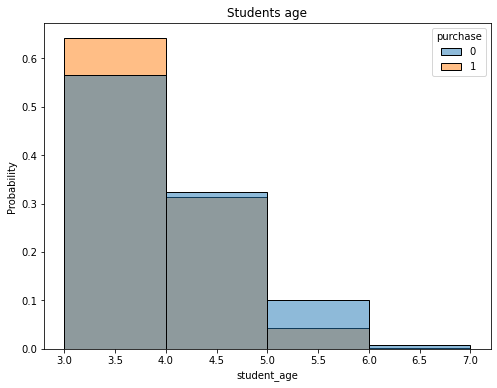

In [34]:
my_hist(d[['purchase', 'student_age']].dropna(), 'student_age', title='Students age', binwidth=1, rotate=0)

In [35]:
age3_g0 = parents[(parents['purchase'] == 0) & 
                  (parents['student_age'] < 4)]['student_age'].count()
age4_g0 = parents[(parents['purchase'] == 0) & 
                  (parents['student_age'] >= 4) & (parents['student_age'] < 5)]['student_age'].count()
age5_g0 = parents[(parents['purchase'] == 0) & 
                  (parents['student_age'] >= 5) & (parents['student_age'] < 6)]['student_age'].count()
age6_g0 = parents[(parents['purchase'] == 0) & 
                  (parents['student_age'] >= 6) & (parents['student_age'] <= 7)]['student_age'].count()

len0 = len(d[d['purchase'] == 0]['student_age'].dropna())

print('Age 3-4 proportion in group 0: ', age3_g0/len0)
print('Age 4-5 proportion in group 0: ', age4_g0/len0)
print('Age 5-6 proportion in group 0: ', age5_g0/len0)
print('Age 6-7 proportion in group 0: ', age6_g0/len0)
print()

age3_g1 = parents[(parents['purchase'] == 1) & 
                  (parents['student_age'] < 4)]['student_age'].count()
age4_g1 = parents[(parents['purchase'] == 1) & 
                  (parents['student_age'] >= 4) & (parents['student_age'] < 5)]['student_age'].count()
age5_g1 = parents[(parents['purchase'] == 1) & 
                  (parents['student_age'] >= 5) & (parents['student_age'] < 6)]['student_age'].count()
age6_g1 = parents[(parents['purchase'] == 1) & 
                  (parents['student_age'] >= 6) & (parents['student_age'] <= 7)]['student_age'].count()

len1 = len(d[d['purchase'] == 1]['student_age'].dropna())

print('Age 3-4 proportion in group 1: ', age3_g1/len1)
print('Age 4-5 proportion in group 1: ', age4_g1/len1)
print('Age 5-6 proportion in group 1: ', age5_g1/len1)
print('Age 6-7 proportion in group 1: ', age6_g1/len1)

Age 3-4 proportion in group 0:  0.5656943405634505
Age 4-5 proportion in group 0:  0.32410870107205186
Age 5-6 proportion in group 0:  0.1012216404886562
Age 6-7 proportion in group 0:  0.008975317875841436

Age 3-4 proportion in group 1:  0.6413632842757552
Age 4-5 proportion in group 1:  0.3139684998709011
Age 5-6 proportion in group 1:  0.042860831396849985
Age 6-7 proportion in group 1:  0.0018073844564936742


In [36]:
stat, pval = proportions_ztest(count=[age3_g0, age3_g1], nobs=[len0, len1])
print('Age 3-4')
print("statistic:", stat)
print("p-value: ", pval)
print()

stat, pval = proportions_ztest(count=[age4_g0, age4_g1], nobs=[len0, len1])
print('Age 4-5')
print("statistic:", stat)
print("p-value: ", pval)
print()

stat, pval = proportions_ztest(count=[age5_g0, age5_g1], nobs=[len0, len1])
print('Age 5-6')
print("statistic:", stat)
print("p-value: ", pval)
print()

stat, pval = proportions_ztest(count=[age6_g0, age6_g1], nobs=[len0, len1])
print('Age 6-7')
print("statistic:", stat)
print("p-value: ", pval)
print()

Age 3-4
statistic: -6.86460603637638
p-value:  6.6674999842767764e-12

Age 4-5
statistic: 0.9656247477260752
p-value:  0.3342319872026318

Age 5-6
statistic: 9.986851351049628
p-value:  1.74021701305523e-23

Age 6-7
statistic: 4.320135765098627
p-value:  1.559332359143498e-05



The difference is significant for ages 3-4, 5-6 and 6-7. 

In other words, purchases are more likely for parents with kids aged 3-4 and less likely for ages 5-7. 

One of the possible reasons is that kids at the age 3-4 years are more easily involved in the study process. Or maybe their parents believe so. 

Or maybe parents believe that this is the perfect time to begin language studies and so they naturally are more committed to purchase a full course (or marketing department works well).

Maybe at later age kids and their parents become more "picky" about courses they want to choose. For example, they could be looking for courses that are better aligned with their elementart school curriculum. If so, this requires deeper insight into competition at this stage - how to convince parents this company is better than numerous other activites competing for their kids attention.  

Or perhaps the company's teachers are better with this particular group (3-4). Or marketing department's efforts have been more succesfull at targeting this particular group.

### Month, day of week and hour

In [37]:
d2 = d[['purchase', 'month']].copy()
d2.dropna(inplace=True)
d2['month'] = d2['month'].astype(int)

In [38]:
d2.value_counts()

purchase  month
0         5        4439
1         5        4087
0         4        2275
1         4        1944
dtype: int64

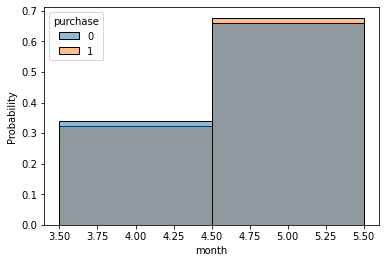

In [39]:
sns.histplot(d2, x='month', discrete=True, hue='purchase', 
             stat='probability', common_norm=False)
plt.show()

In [40]:
group_diff(d2, 'month', 4)

Variable:  month
Value:  4
2275 1944
statistic: 1.9774905593100431
p-value:  0.04798620659973936



In [41]:
group_diff(d2, 'month', 5)

Variable:  month
Value:  5
4439 4087
statistic: -1.9774905593100365
p-value:  0.047986206599740094



Even though the difference is significant, it is very small. There are only two months in the sample, and probability of purchase was slightly higher in May than in April. Even though this could be seasonality, this could also some random fluctuation in monthly data.

The data is prepandemic (year 2019).

In [42]:
d3 = d[['purchase', 'day_of_week']].copy()
d3.dropna(inplace=True)
d3['day_of_week'] = d3['day_of_week'].astype(int)

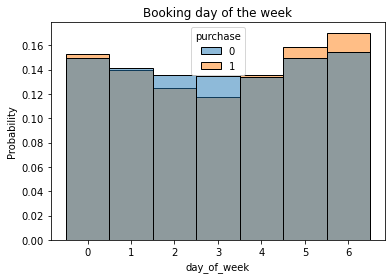

In [43]:
sns.histplot(d3, x='day_of_week', discrete=True, hue='purchase', 
             stat='probability', common_norm=False)
plt.title('Booking day of the week')
plt.show()

In [44]:
for i in range(7):
    group_diff(d3, 'day_of_week', i)

Variable:  day_of_week
Value:  0
1006 924
statistic: -0.5302545152070861
p-value:  0.5959354782792634

Variable:  day_of_week
Value:  1
949 845
statistic: 0.20048821060288252
p-value:  0.8410987773985703

Variable:  day_of_week
Value:  2
910 755
statistic: 1.731277548859701
p-value:  0.08340227375932413

Variable:  day_of_week
Value:  3
903 707
statistic: 2.929711477516052
p-value:  0.00339276862739581

Variable:  day_of_week
Value:  4
902 816
statistic: -0.15758999315869798
p-value:  0.8747798893401888

Variable:  day_of_week
Value:  5
1004 957
statistic: -1.4281103367779104
p-value:  0.1532601027280615

Variable:  day_of_week
Value:  6
1040 1027
statistic: -2.352794121242624
p-value:  0.01863294738475015



Significant difference was found for Thursdays and Sundays. If a trial class is booked on Thursdays there is a higher probability of no-purchase, while on Sundays it is higher for purchase.

Sunday seems natural because this is the time when parents and their kids have time to  thoroughly choose a school and can concentrate on the study.

Thursday, however, is a surprise. Perhaps there is a manager who has shifts on Thursdays and is not doing particularly well? 

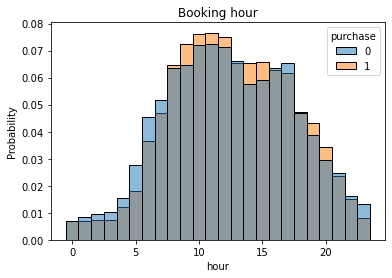

In [45]:
d4 = d[['purchase', 'hour']].copy()
d4.dropna(inplace=True)
d4['hour'] = d4['hour'].astype(int)
sns.histplot(d4, x='hour', discrete=True, hue='purchase', 
             stat='probability', common_norm=False)
plt.title('Booking hour')
plt.show()

In [46]:
for i in range(1, 24):
    group_diff(d4, 'hour', i)

Variable:  hour
Value:  1
57 43
statistic: 0.8687619949711564
p-value:  0.38497732447148236

Variable:  hour
Value:  2
63 45
statistic: 1.181840000867007
p-value:  0.23726919258432866

Variable:  hour
Value:  3
68 44
statistic: 1.710627517276768
p-value:  0.08714989588451424

Variable:  hour
Value:  4
104 73
statistic: 1.6308298733137911
p-value:  0.10292622212948424

Variable:  hour
Value:  5
186 108
statistic: 3.678075532987513
p-value:  0.00023500037463823034

Variable:  hour
Value:  6
305 221
statistic: 2.48891536041758
p-value:  0.01281334661755211

Variable:  hour
Value:  7
347 283
statistic: 1.237436862044937
p-value:  0.21592494080709024

Variable:  hour
Value:  8
426 391
statistic: -0.3180749968284846
p-value:  0.7504280491297616

Variable:  hour
Value:  9
434 436
statistic: -1.7102502092750487
p-value:  0.08721961467977782

Variable:  hour
Value:  10
484 459
statistic: -0.865360782029134
p-value:  0.3868407992728903

Variable:  hour
Value:  11
487 462
statistic: -0.8737051115

When booking a trial class between 5 to 6 AM parents are less likely to purchase a full course.

Perhaps this is done before work/school and parents are less focused so maybe this is why they are less likely to buy a full course later.

# Conclusion

1. “Purchasers” use desktop devices more frequently. An inquiry into company's mobile app is required, i.e. it could have technical issues, inefficient customer journey map ("too many clicks needed"), unintuitive UI, etc.

1. Purchases are more likely for parents with kids aged 3-4 and less likely for ages 5-7. The explanation could lie in "overtargeting" a specific audience at the company's website, i.e. customers using company's website might conclude that the courses are better suited for younger kids. Also this might be due to more factors competing for kids attention as they grow, which requires broader market competition analysis.

1. Topics 1418 and 1643 have higher probability of conversion while 1513 and 1310 - lower. This might be due to the latter having inconsistent curriculum, teachers' self-selection, or targeting the "wrong" audience.

1. Bookings during Sundays are more likely to become a purchase while bookings during Thursdays are less so. Also, booking a trial class between 5 to 6 AM is less likely to achieve conversion. I do not have a ready business explanation for this. Perhaps this can be attributed to using UTC timing without proper time zone segregation. Enriching data with geography could further benefit the analysis.